<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
!pip install -q numpy pandas seaborn

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

In [8]:
data.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [10]:
# Create a NumPy array from the column Class in data by applying the method to_numpy(), then assign it to the variable Y
Y = data['Class'].to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [11]:
# Standardize the data in X then reassign it to the variable X using the transform 
# Create a StandardScaler object and fit it to the input features X
transform = preprocessing.StandardScaler()
# Transform the input features X using the StandardScaler
X_transform = transform.fit_transform(X)
# StandardScaler standardizes features by removing the mean and scaling to unit variance

# Convert the transformed features back into a DataFrame for better readability
X_scaled_df = pd.DataFrame(X_transform, columns=X.columns)

# Display the first 5 rows of the standardized features
print("Standardized input features (first 5 rows):")
print(X_scaled_df.head())

Standardized input features (first 5 rows):
   FlightNumber   PayloadMass   Flights     Block  ReusedCount  Orbit_ES-L1  \
0     -1.712912 -1.948145e-16 -0.653913 -1.575895     -0.97344       -0.106   
1     -1.674419 -1.195232e+00 -0.653913 -1.575895     -0.97344       -0.106   
2     -1.635927 -1.162673e+00 -0.653913 -1.575895     -0.97344       -0.106   
3     -1.597434 -1.200587e+00 -0.653913 -1.575895     -0.97344       -0.106   
4     -1.558942 -6.286706e-01 -0.653913 -1.575895     -0.97344       -0.106   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0     -0.106  -0.654654     -0.106  -0.551677  ...     -0.185695   
1     -0.106  -0.654654     -0.106  -0.551677  ...     -0.185695   
2     -0.106  -0.654654     -0.106   1.812654  ...     -0.185695   
3     -0.106  -0.654654     -0.106  -0.551677  ...     -0.185695   
4     -0.106   1.527525     -0.106  -0.551677  ...     -0.185695   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_Tr

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [20]:
# Split the standardized input features (X_transform) and target labels (Y)
# into training and testing sets with 20% of the data reserved for testing
X_train, X_test, Y_train, Y_test = train_test_split(X_transform, Y, test_size=0.2, random_state=2) # test_size=0.2 means 20% of the data will be used for testing
# random_state=2 ensures reproducibility of the results

# Reconstruct DataFrames with proper column names for compatibility with GridSearchCV and prediction
X_train_scaled_df = pd.DataFrame(X_train, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test, columns=X.columns)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)

Shape of X_train: (72, 83)
Shape of X_test: (18, 83)
Shape of Y_train: (72,)


we can see we only have 18 test samples.


In [13]:
print("Shape of Y_test:", Y_test.shape)

Shape of Y_test: (18,)


## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
# Define the grid of hyperparameters for GridSearchCV
parameters ={'C':[0.01,0.1,1], # Regularization strength; smaller values specify stronger regularization
             'penalty':['l2'], # Penalty type; 'l2' corresponds to Ridge regularization
             'solver':['lbfgs']} # Optimization algorithm; 'lbfgs' works well for small datasets and supports l2 penalty

In [21]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']} # l1 lasso l2 ridge 
# l1 = Lasso regularization, which encourages sparsity
# l2 = Ridge regularization, which penalizes large coefficients to reduce overfitting

# Initialize the logistic regression model (can be used with GridSearchCV to find the best combination of parameters)
lr=LogisticRegression()

# Create a GridSearchCV object logreg_cv with 10-fold cross validation.
logreg_cv = GridSearchCV(lr, parameters, cv=10)
# Fit the model to the training data standardized features and target labels
logreg_cv.fit(X_train_scaled_df, Y_train)

# Find the best values for the free parameters 
# Retrieve the best combination of hyperparameters and the corresponding model
best_model = logreg_cv.best_estimator_
# Print the best model
print("Best Logistic Regression Model:", best_model)


Best Logistic Regression Model: LogisticRegression(C=0.01)


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [22]:
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [47]:
# Use the best model found by GridSearchCV to predict using the fixed DataFrame
y_pred_lr = best_model.predict(X_test_scaled_df)

# Accuracy of test data using the method score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred_lr)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8333


Lets look at the confusion matrix:


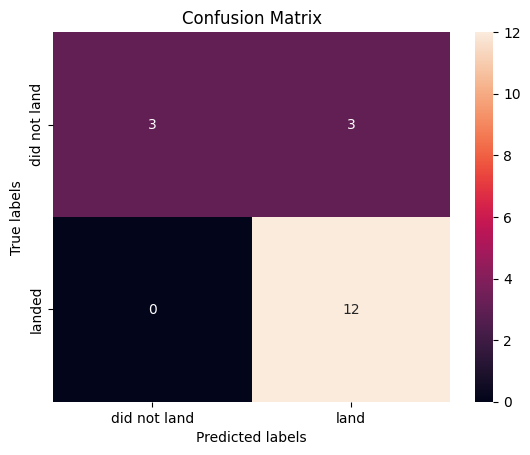

In [26]:
yhat=logreg_cv.predict(X_test_scaled_df)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [30]:
# Support Vector Machine classifier finds the optimal hyperplane separating class (did not land, landed)
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

# Create a GridSearchCV object logreg_cv with 10-fold cross validation.
svm_cv = GridSearchCV(svm, parameters, cv=10)
# Fit the model to the training data standardized features and target labels
svm_cv.fit(X_train_scaled_df, Y_train)

# Find the best values for the free parameters 
# Retrieve the best combination of hyperparameters and the corresponding model
best_object = svm_cv.best_estimator_
# Print the best model
print("Best Support Vector Machine Object:", best_object)

Best Support Vector Machine Object: SVC(gamma=0.03162277660168379, kernel='sigmoid')


In [29]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [48]:
# Use the best model found by GridSearchCV to predict using the fixed DataFrame
y_pred_svm = best_object.predict(X_test_scaled_df)

# Accuracy of test data using the method score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred_svm)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8333


We can plot the confusion matrix


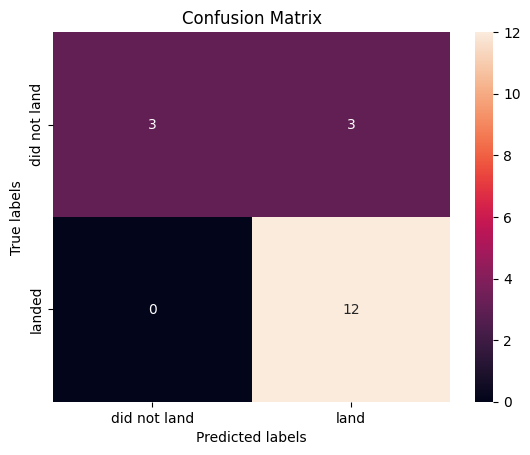

In [32]:
yhat=svm_cv.predict(X_test_scaled_df)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [35]:
parameters = {
    'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', 'log2', None],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier()

# Create a GridSearchCV object tree_cv with 10-fold cross validation.
tree_cv = GridSearchCV(tree, parameters, cv=10)
# Fit the model to the training data standardized features and target labels
tree_cv.fit(X_train_scaled_df, Y_train)

# Find the best values for the free parameters 
# Retrieve the best combination of hyperparameters and the corresponding model
best_parameters = tree_cv.best_estimator_
# Print the best model
print("Best Tree Classifier Parameters:", best_parameters)

Best Tree Classifier Parameters: DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_leaf=2, splitter='random')


In [36]:
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.9035714285714287


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [49]:
# Use the best model found by GridSearchCV to predict using the fixed DataFrame
y_pred_tree = best_parameters.predict(X_test_scaled_df)

# Accuracy of test data using the method score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred_tree)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9444


We can plot the confusion matrix


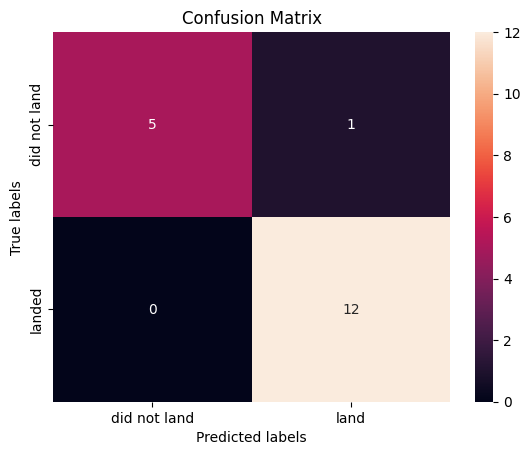

In [40]:
yhat = tree_cv.predict(X_test_scaled_df)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [42]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
# Create a GridSearchCV object knn_cv with 10-fold cross validation.
knn_cv = GridSearchCV(KNN, parameters, cv=10)
# Fit the model to the training data standardized features and target labels
knn_cv.fit(X_train_scaled_df, Y_train)

# Find the best values for the free parameters 
# Retrieve the best combination of hyperparameters and the corresponding model ror training data
best_parameters_knn = knn_cv.best_estimator_
# Print the best model
print("Best K-Nearest Neighbor Classifier Parameters:", best_parameters_knn)

Best K-Nearest Neighbor Classifier Parameters: KNeighborsClassifier(n_neighbors=10, p=1)


In [ ]:
# Returns only the dictionary of hyperparameter values that were chosen as best in simple and clean display
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [50]:
# Use the best model found by GridSearchCV to predict using the fixed DataFrame
y_pred_knn = best_parameters_knn.predict(X_test_scaled_df)

# Accuracy of test data using the method score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred_knn)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8333


We can plot the confusion matrix


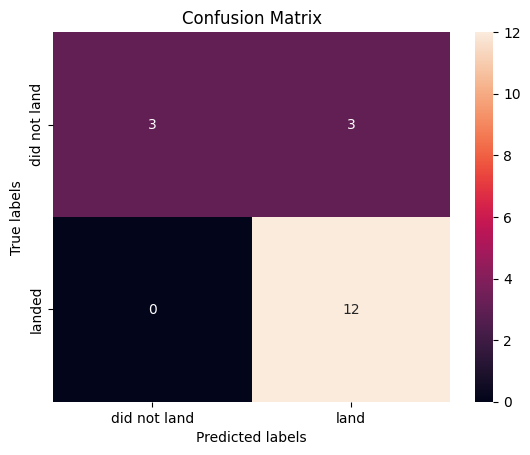

In [ ]:
yhat = knn_cv.predict(X_test_scaled_df)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [53]:
print(f"KNN Testing Accuracy: {accuracy_score(Y_test, y_pred_knn) * 100:.3f}%") # .3f formats a floating-point number to three decimal places (e.g., 0.123)
print(f"DecTree Testing Accuracy: {accuracy_score(Y_test, y_pred_tree) * 100:.3f}%")
print(f"SVM Testing Accuracy: {accuracy_score(Y_test, y_pred_svm) * 100:.3f}%")
print(f"LogReg Testing Accuracy: {accuracy_score(Y_test, y_pred_lr) * 100:.3f}%")

# Import metrics for evaluating model performance
from sklearn.metrics import classification_report

print("\nKNN Testing Data Classification Report:")
print(classification_report(Y_test, y_pred_knn))

print("\nDecTree Testing Data Classification Report:")
print(classification_report(Y_test, y_pred_tree))

print("\nSVM Testing Data Classification Report:")
print(classification_report(Y_test, y_pred_svm))

print("\nLogReg Testing Data Classification Report:")
print(classification_report(Y_test, y_pred_lr))

KNN Testing Accuracy: 83.333%
DecTree Testing Accuracy: 94.444%
SVM Testing Accuracy: 83.333%
LogReg Testing Accuracy: 83.333%

KNN Testing Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


DecTree Testing Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.92      1.00      0.96        12

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18


SVM Testing Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50    

In [58]:
!pip install -q matplotlib

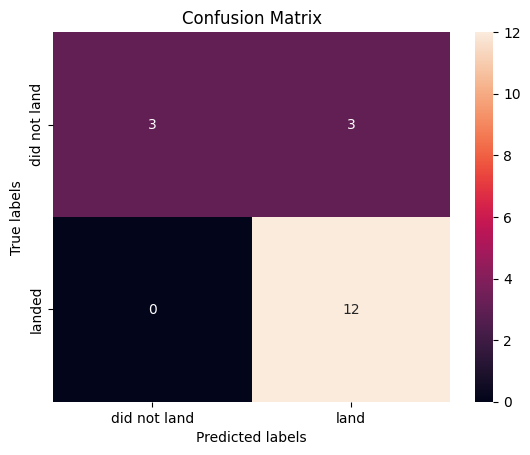

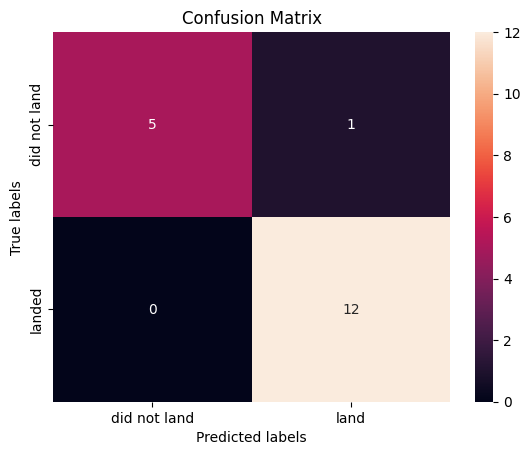

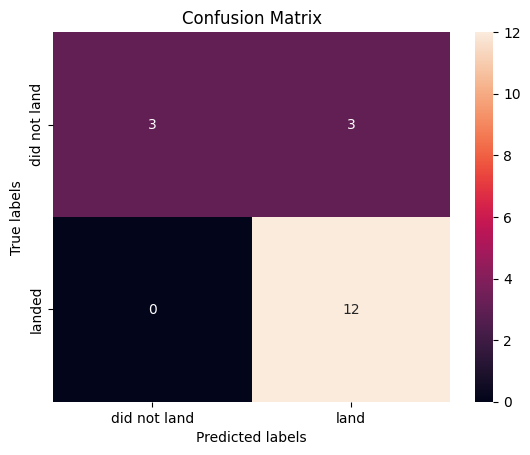

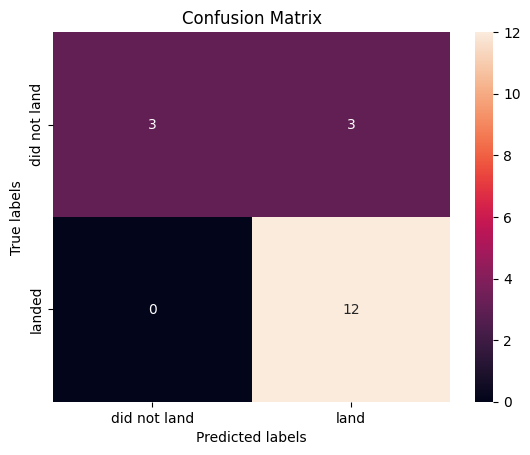

In [61]:
# Plot the KNN Confusion Matrix
yhat_knn = knn_cv.predict(X_test_scaled_df)
plot_confusion_matrix(Y_test,yhat_knn)

# Plot the Decision Tree Confusion Matrix
yhat_tree = tree_cv.predict(X_test_scaled_df)
plot_confusion_matrix(Y_test,yhat_tree)

# Plot the SVM Confusion Matrix
yhat_svm = svm_cv.predict(X_test_scaled_df)
plot_confusion_matrix(Y_test,yhat_svm)

# Plot the Logistic Regression Confusion Matrix
yhat_lr = logreg_cv.predict(X_test_scaled_df)
plot_confusion_matrix(Y_test,yhat_lr)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
